# Project no. 1: Explore Weather Trends

## Name: Keila González Gómez

## Introduction
<div style="text-align: justify"> This project's goal is to carry out a basic comparison between datasets. One contains average global temperatures and the other average temperatures of the main cities in the world. The city we had to make the comparison with, was the one we lived in (or one closer to it). The city of my election was Santo Domingo, Dominican Republic.</div>

## Data Extraction
This part comprised the extraction of the required datasets from a Database using SQL. The queries used to extract the data were:

<font color=blue>SELECT</font>  * <font color=blue>FROM</font> Name of the database <font color=blue>WHERE</font> 
condition

Where:
* SELECT specifies that a selection will be made; 
* (*) Is the character employed when one wants to retrieve all columns
* WHERE is used to filter the data and keep only the data records that fulfill certain condiction

<div style="text-align: justify"> First the existence of the city of interest was verified within the city_list. Second the average temperatures for this exact city and country were extracted and finally the global and local data were downloaded. The lines of code ran to achieve this were: </div>

<font color=purple>SELECT</font>  * <font color=purple>FROM</font> city_list <font color=purple>WHERE</font> city = <font color=red>'Santo Domingo'</font> <font color=purple> and </font> country = <font color=red>'Dominican Republic'</font>

<font color=purple>SELECT</font>  * <font color=purple>FROM</font> city_data <font color=purple>WHERE</font> city = <font color=red>'Santo Domingo'</font> <font color=purple> and </font> country = <font color=red>'Dominican Republic'</font>

<font color=purple>SELECT</font>  * <font color=purple>FROM</font> global_data 

Those tables were downloaded to a .csv file

## Open up the CSV
<div style="text-align: justify">The files were handled with python 3 using the package pandas. The .csv files were converted to the DataFrames object. Before anything, the data was inspected using the function head(), in order to verify where and how the values where stored.</div>

In [62]:
import pandas as pd
from matplotlib import pyplot as plt

#Se crean dataframes con las tablas descargadas
Data1 = pd.read_csv("/Volumes/DRU/Cursos y Material aprendizaje/Cursos/Udacity/Lesson 1- Welcome/Project1/StoDgoRD.csv")
Data2 = pd.read_csv("/Volumes/DRU/Cursos y Material aprendizaje/Cursos/Udacity/Lesson 1- Welcome/Project1/global_data.csv")

#Se inspeccionaron los datos descargados
Data1.head
Data2.head

<bound method NDFrame.head of      year  avg_temp
0    1750      8.72
1    1751      7.98
2    1752      5.78
3    1753      8.39
4    1754      8.47
..    ...       ...
261  2011      9.52
262  2012      9.51
263  2013      9.61
264  2014      9.57
265  2015      9.83

[266 rows x 2 columns]>

## Create a line chart
### Data organization

<div style="text-align: justify">In order to create the line chart, the datasets had to be organized. 
The recorded years of the city of Santo Domingo varied from those in the global file. In order to plot only coinciding years from both tables, the datasframes were joined. This is simply the action of to combining rows from two or more tables based on a common column, in this case, the column with the years. The records kept were those with matching values in both tables.</div>

In [5]:
#were joined with the global temperatures by their common field 'year'
Comparison = pd.merge(Data1, Data2[["year", "avg_temp"]], on = "year" )

Comparison.head()

,year,city,country,avg_temp_x,avg_temp_y
0,1824,Santo Domingo,Dominican Republic,25.89,8.55
1,1825,Santo Domingo,Dominican Republic,26.05,8.39
2,1826,Santo Domingo,Dominican Republic,25.85,8.36
3,1827,Santo Domingo,Dominican Republic,26.28,8.81
4,1828,Santo Domingo,Dominican Republic,26.22,8.17


A quick inspection revealed that there were some missing values from the temperatures from Santo Domingo. 

In [63]:
Comparison.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 190 entries, 0 to 189
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   year                 190 non-null    int64  
 1   city                 190 non-null    object 
 2   country              190 non-null    object 
 3   avg_temp_x           185 non-null    float64
 4   avg_temp_y           190 non-null    float64
 5   MovingWindow_DR      157 non-null    float64
 6   MovingWindow_global  171 non-null    float64
dtypes: float64(4), int64(1), object(2)
memory usage: 11.9+ KB


### Moving windows
<div style="text-align: justify">The data from the resulting joined DataFrame 'Comparison' was first plotted as such and the resulting plot seemed volatile. The previous inspection showed that the records of the temperatures form Santo Domingo were not complete, the graph showed where exactly those values were missing. This interval of empty values for sure will modify the real moving-average values that could be obtained from these years. </div>

Text(0, 0.5, 'Avg. Temperatures (º Celcius)')

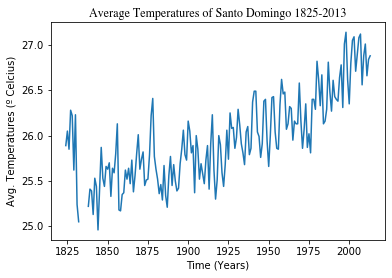

In [42]:
plt.plot(Comparison.year, Comparison.avg_temp_x)
plt.title('Average Temperatures of Santo Domingo 1825-2013', fontname="Times", fontsize=12)
plt.xlabel('Time (Years)')
plt.ylabel('Avg. Temperatures (º Celcius)')

In order to smooth it, the average window of 20 years was created, this was the smaller non volatile window from the ones inspected. The built-in pandas function called "rolling" was utilized.

In [12]:
#first the moving average of the dominican temperatures values were computed
#a new column was created in the Data Frame comparison named MovingWindow_DR 
#The function requires the specification of the column with wich the AVG will be obtained and the window size.
Comparison['MovingWindow_DR'] = Comparison.iloc[:,3].rolling(window=20).mean()

#Same for the global temperatures, the location of that column is the no. 4, window size = 20.
Comparison['MovingWindow_global'] = Comparison.iloc[:,4].rolling(window=20).mean()

#The resulting dataset was inspected
Comparison.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 190 entries, 0 to 189
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   year                 190 non-null    int64  
 1   city                 190 non-null    object 
 2   country              190 non-null    object 
 3   avg_temp_x           185 non-null    float64
 4   avg_temp_y           190 non-null    float64
 5   MovingWindow_DR      157 non-null    float64
 6   MovingWindow_global  171 non-null    float64
dtypes: float64(4), int64(1), object(2)
memory usage: 11.9+ KB


A new plot with the moving window average values was generated:

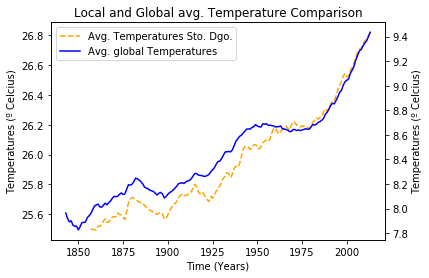

In [60]:
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(Comparison.year, Comparison.MovingWindow_DR, '--', color="orange", label = "Avg. Temperatures Sto. Dgo.")
ax2.plot(Comparison.year, Comparison.MovingWindow_global, 'b-', label = "Avg. global Temperatures")

ax1.title.set_text('Local and Global avg. Temperature Comparison')

ax1.set_xlabel("Time (Years)")
ax1.set_ylabel('Temperatures (º Celcius)', color='black')
ax2.set_ylabel('Temperatures (º Celcius)', color='black')

lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc=0)


plt.show()

### Data visualization
<div style="text-align: justify">The plot describes the changes in temperatures for both, the world and the city of Santo Domingo, by means of a dual y-axis chart. 
The temperatures of Santo Domingo are referred to as ‘local’. The color difference outlines the difference between local and global. None of the axes start at zero due to the fact that the main goal of the chart is to show changes in both categories in addition to comparing the values of the avg. temperatures.
The independent variable is the time in years and both y-axes show the temperatures in ºCelsius. The local temperatures are on the left and to the right the global average temperatures. These were represented like that because the temperatures of the Caribbean are logically higher than the global average thus in a regular chart these lines would be far from each other. This way, whilst can be misleading that Sto. Dgo.'s temperatures seem lower than the global average (which is not true because they are rendered following the left y-axis) one can compare their trends with ease. </div>

## Observations from the chart
<div style="text-align: justify"> The chart shows:
    
1. Values of both datasets are quite different:
    
The ranges of each table have a difference of around 18º Celsius. The temperatures of the city of Santo Domingo are quite higher than the global temperatures. 
    
2. Both lines show overall rising tendency: 
    
Temperatures are increasing, both the global and the local ones. In the end global ones are obtained from the conflation of local measurements, thus to some extent the values of the global temperatures depend on the local values. Nonetheless, the impact of the temperatures of Santo Domingo on the global average values is not that strong. We could say that Santo Domingo shares the global trend.
    
3. Both lines show a recent spike:
    
Even though both datasets have raised less than 2º overall, the rising tendency seems to have spiked in recent decades. These increases are both in different ranges of temperatures. Trying to infer this spiked increase could be less straightforward if using the chart with the original values.
    
4. The two lines follow a similar pattern:
    
Both charts seem to have similar trends with sharp increases during the seventeenth century, what seemed like decrease during the 20th century, and sharp increase in the current one. Also, one thing to note is that the size of the moving window impacts heavily the smoothens of the data so in order to verify how true are these similarity between trends one would have to inspect other orders of moving windows.
</div>